1. Loading the parquet file for analysis.

In [73]:
import matrix as matrix
import pandas as pd
import numpy as np
import seaborn as sns
import pyarrow
import fastparquet


df = pd.read_parquet('cdi.parquet')

print(df.head())

   YearStart  YearEnd LocationAbbr LocationDesc DataSource  \
0       2010     2010           AK       Alaska       NVSS   
1       2017     2017           AK       Alaska       NVSS   
2       2018     2018           AK       Alaska       NVSS   
3       2011     2011           AK       Alaska       NVSS   
4       2012     2012           AK       Alaska       NVSS   

                    Topic                                Question Response  \
0                 Alcohol         Chronic liver disease mortality     None   
1                 Alcohol         Chronic liver disease mortality     None   
2                 Alcohol         Chronic liver disease mortality     None   
3  Chronic Kidney Disease  Mortality with end-stage renal disease     None   
4  Chronic Kidney Disease  Mortality with end-stage renal disease     None   

  DataValueUnit DataValueType  ... LocationID  TopicID QuestionID  \
0                      Number  ...          2      ALC     ALC6_0   
1                   

In [4]:
print(df.info)

<bound method DataFrame.info of          YearStart  YearEnd LocationAbbr   LocationDesc DataSource  \
0             2010     2010           AK         Alaska       NVSS   
1             2017     2017           AK         Alaska       NVSS   
2             2018     2018           AK         Alaska       NVSS   
3             2011     2011           AK         Alaska       NVSS   
4             2012     2012           AK         Alaska       NVSS   
...            ...      ...          ...            ...        ...   
1082323       2020     2020           WA     Washington      BRFSS   
1082324       2020     2020           WV  West Virginia      BRFSS   
1082325       2020     2020           WY        Wyoming      BRFSS   
1082326       2020     2020           VT        Vermont      BRFSS   
1082327       2020     2020           WI      Wisconsin      BRFSS   

                                                   Topic  \
0                                                Alcohol   
1      

In [5]:
print(df.isna().sum())

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Topic                              0
Question                           0
Response                     1082328
DataValueUnit                      0
DataValueType                      0
DataValue                          0
DataValueAlt                  355136
DataValueFootnoteSymbol            0
DatavalueFootnote                  0
LowConfidenceLimit            465077
HighConfidenceLimit           465077
StratificationCategory1            0
Stratification1                    0
StratificationCategory2      1082328
Stratification2              1082328
StratificationCategory3      1082328
Stratification3              1082328
GeoLocation                        0
ResponseID                   1082328
LocationID                         0
TopicID                            0
QuestionID                         0
D

In [6]:
print(df.shape)

(1082328, 34)


In [7]:
print(df.columns)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


In [8]:
print(df[['YearEnd','DataValue']].describe(include="all"))

             YearEnd DataValue
count   1.082328e+06   1082328
unique           NaN     42288
top              NaN          
freq             NaN    353093
mean    2.015196e+03       NaN
std     2.738999e+00       NaN
min     2.001000e+03       NaN
25%     2.013000e+03       NaN
50%     2.015000e+03       NaN
75%     2.017000e+03       NaN
max     2.021000e+03       NaN


In [9]:
print(df.describe(include='all'))

           YearStart       YearEnd LocationAbbr LocationDesc DataSource  \
count   1.082328e+06  1.082328e+06      1082328      1082328    1082328   
unique           NaN           NaN           55           55         31   
top              NaN           NaN           NY     New York      BRFSS   
freq             NaN           NaN        20608        20608     597950   
mean    2.014678e+03  2.015196e+03          NaN          NaN        NaN   
std     3.082694e+00  2.738999e+00          NaN          NaN        NaN   
min     2.001000e+03  2.001000e+03          NaN          NaN        NaN   
25%     2.012000e+03  2.013000e+03          NaN          NaN        NaN   
50%     2.015000e+03  2.015000e+03          NaN          NaN        NaN   
75%     2.017000e+03  2.017000e+03          NaN          NaN        NaN   
max     2.021000e+03  2.021000e+03          NaN          NaN        NaN   

          Topic                                           Question Response  \
count   1082328     

Drop the null data, first the empty columns.

In [10]:
df = df.drop(columns=['Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3','StratificationID3'])

In [11]:
print(df.shape)

(1082328, 24)


In [12]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,,Number,70,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,,Number,121,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,,Number,121,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
3,2011,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,,Number,221,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
4,2012,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,,Number,234,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082323,2020,2020,WA,Washington,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,%,Crude Prevalence,37.2,...,44.4,Race/Ethnicity,"Black, non-Hispanic",POINT (-120.47001078999972 47.52227862900048),53,NPAW,NPAW1_1,CRDPREV,RACE,BLK
1082324,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,%,Age-adjusted Prevalence,47.6,...,52.2,Race/Ethnicity,"White, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT
1082325,2020,2020,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,58.2,...,65.6,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,COPD,COPD7_0,CRDPREV,RACE,WHT
1082326,2020,2020,VT,Vermont,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,%,Crude Prevalence,90.5,...,96.0,Race/Ethnicity,"Other, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),50,OVC,OVC6_2,CRDPREV,RACE,OTH


Exploring if the data is available per year or per period

In [13]:
df['diff_year'] = np.where((df['YearStart'] != df['YearEnd']),'Period','Year')
df_per_period = df[df['diff_year'].str.contains('Period')]
# Verify the shape of the new database
df_per_period.shape

(140986, 25)

In [14]:
#Checking the empty values in the new database
df_per_period.isna().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
DataSource                       0
Topic                            0
Question                         0
DataValueUnit                    0
DataValueType                    0
DataValue                        0
DataValueAlt                 37805
DataValueFootnoteSymbol          0
DatavalueFootnote                0
LowConfidenceLimit           71856
HighConfidenceLimit          71856
StratificationCategory1          0
Stratification1                  0
GeoLocation                      0
LocationID                       0
TopicID                          0
QuestionID                       0
DataValueTypeID                  0
StratificationCategoryID1        0
StratificationID1                0
diff_year                        0
dtype: int64

In [15]:
#Check for duplicates in the new database
df_per_period.duplicated().sum()

0

In [16]:
#Exporting to csv for a different analysis
#df_per_period.to_csv('dataperiod.csv')

Creating a new data frame per year

In [17]:
#Finding the number of data available to National and State level
df_per_year = df[df['diff_year'].str.contains('Year')]
df_per_year.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,diff_year
0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,,Number,70,...,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR,Year
1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,,Number,121,...,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR,Year
2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,,Number,121,...,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR,Year
3,2011,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,,Number,221,...,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT,Year
4,2012,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,,Number,234,...,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT,Year


In [18]:
df_per_year.shape

(941342, 25)

In [19]:
df_per_period.isna().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
DataSource                       0
Topic                            0
Question                         0
DataValueUnit                    0
DataValueType                    0
DataValue                        0
DataValueAlt                 37805
DataValueFootnoteSymbol          0
DatavalueFootnote                0
LowConfidenceLimit           71856
HighConfidenceLimit          71856
StratificationCategory1          0
Stratification1                  0
GeoLocation                      0
LocationID                       0
TopicID                          0
QuestionID                       0
DataValueTypeID                  0
StratificationCategoryID1        0
StratificationID1                0
diff_year                        0
dtype: int64

In [20]:
df_per_year.duplicated().sum()

0

In [21]:
#Dropping columns after check if the data is the same
df_per_year = df_per_year.drop(columns=['YearEnd', 'diff_year'])

In [22]:
#Check if the changes were applied
df_per_year.shape

(941342, 23)

In [23]:
# Rename columns to simplify the analysis
df_per_year = df_per_year.rename({'YearStart': 'Year', 'LocationDesc': 'Location'}, axis=1)

In [24]:
#Veryfy if the columns are renamed
df_per_year.head()

,Year,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,,Number,70,70.0,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
1,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,,Number,121,121.0,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
2,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,,Number,121,121.0,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
3,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,,Number,221,221.0,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
4,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,,Number,234,234.0,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT


Look over if the column DataValue and DataValueAlt have the same data and drop one

In [25]:
#Before comparison between the data, we checked the data types.
df_per_year.dtypes

Year                           int64
LocationAbbr                  object
Location                      object
DataSource                    object
Topic                         object
Question                      object
DataValueUnit                 object
DataValueType                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
GeoLocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    object
DataValueTypeID               object
StratificationCategoryID1     object
StratificationID1             object
dtype: object

In [26]:
#Converting both Columns into numbers to proceed to compare.
cols = ['DataValueAlt', 'DataValue']
df_per_year[cols] = df_per_year[cols].apply(pd.to_numeric, errors='coerce')
df_per_year['DataValueAlt'].convert_dtypes()
df_per_year.dtypes

Year                           int64
LocationAbbr                  object
Location                      object
DataSource                    object
Topic                         object
Question                      object
DataValueUnit                 object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
GeoLocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    object
DataValueTypeID               object
StratificationCategoryID1     object
StratificationID1             object
dtype: object

In [27]:
#Counting the empty values, because Python can't compare it.
df_per_year[df_per_year['DataValueAlt'].isna()]

,Year,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
13,2011,AK,Alaska,PRAMS,Tobacco,Cigarette smoking before pregnancy,%,Crude Prevalence,NaN,NaN,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,TOB,TOB1_4,CRDPREV,OVERALL,OVR
14,2017,AK,Alaska,SEDD; SID,Asthma,Emergency department visit rate for asthma,"cases per 10,000",Age-adjusted Rate,NaN,NaN,...,NaN,Race/Ethnicity,Hispanic,POINT (-147.72205903599973 64.84507995700051),2,AST,AST2_1,AGEADJRATE,RACE,HIS
15,2010,AK,Alaska,SEDD; SID,Diabetes,Amputation of a lower extremity attributable t...,,Number,NaN,NaN,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,DIA,DIA4_0,NMBR,OVERALL,OVR
32,2014,AL,Alabama,SEDD; SID,Asthma,Hospitalizations for asthma,"cases per 10,000",Crude Rate,NaN,NaN,...,NaN,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1,AST,AST3_1,CRDRATE,GENDER,GENM
33,2017,AL,Alabama,SEDD; SID,Cardiovascular Disease,Hospitalization for stroke,,Number,NaN,NaN,...,NaN,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1,CVD,CVD3_1,NMBR,GENDER,GENM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082314,2020,WV,West Virginia,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,NaN,NaN,...,NaN,Race/Ethnicity,"Black, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54,CVD,CVD10_2,AGEADJPREV,RACE,BLK
1082316,2020,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,%,Crude Prevalence,NaN,NaN,...,NaN,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,AST,AST6_2,CRDPREV,RACE,MRC
1082319,2020,WI,Wisconsin,BRFSS,Chronic Obstructive Pulmonary Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,NaN,NaN,...,NaN,Race/Ethnicity,Hispanic,POINT (-89.81637074199966 44.39319117400049),55,COPD,COPD8_0,AGEADJPREV,RACE,HIS
1082321,2020,VT,Vermont,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Crude Prevalence,NaN,NaN,...,NaN,Race/Ethnicity,"Black, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),50,OVC,OVC8_0,CRDPREV,RACE,BLK


In [28]:
#Adding a new column name data_values to filter if they are different before dropping it.
df_per_year['data_values'] = np.where((df_per_year['DataValue'] != df_per_year['DataValueAlt']),'Different','Same')

In [29]:
#Displaying the data frame with different values. Important. it is going to include the empty values.
df_per_year[df_per_year['data_values'].str.contains('Different')]

,Year,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,data_values
13,2011,AK,Alaska,PRAMS,Tobacco,Cigarette smoking before pregnancy,%,Crude Prevalence,NaN,NaN,...,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,TOB,TOB1_4,CRDPREV,OVERALL,OVR,Different
14,2017,AK,Alaska,SEDD; SID,Asthma,Emergency department visit rate for asthma,"cases per 10,000",Age-adjusted Rate,NaN,NaN,...,Race/Ethnicity,Hispanic,POINT (-147.72205903599973 64.84507995700051),2,AST,AST2_1,AGEADJRATE,RACE,HIS,Different
15,2010,AK,Alaska,SEDD; SID,Diabetes,Amputation of a lower extremity attributable t...,,Number,NaN,NaN,...,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,DIA,DIA4_0,NMBR,OVERALL,OVR,Different
32,2014,AL,Alabama,SEDD; SID,Asthma,Hospitalizations for asthma,"cases per 10,000",Crude Rate,NaN,NaN,...,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1,AST,AST3_1,CRDRATE,GENDER,GENM,Different
33,2017,AL,Alabama,SEDD; SID,Cardiovascular Disease,Hospitalization for stroke,,Number,NaN,NaN,...,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1,CVD,CVD3_1,NMBR,GENDER,GENM,Different
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082314,2020,WV,West Virginia,BRFSS,Cardiovascular Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,NaN,NaN,...,Race/Ethnicity,"Black, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54,CVD,CVD10_2,AGEADJPREV,RACE,BLK,Different
1082316,2020,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,%,Crude Prevalence,NaN,NaN,...,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,AST,AST6_2,CRDPREV,RACE,MRC,Different
1082319,2020,WI,Wisconsin,BRFSS,Chronic Obstructive Pulmonary Disease,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,NaN,NaN,...,Race/Ethnicity,Hispanic,POINT (-89.81637074199966 44.39319117400049),55,COPD,COPD8_0,AGEADJPREV,RACE,HIS,Different
1082321,2020,VT,Vermont,BRFSS,Overarching Conditions,Prevalence of sufficient sleep among adults ag...,%,Crude Prevalence,NaN,NaN,...,Race/Ethnicity,"Black, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),50,OVC,OVC8_0,CRDPREV,RACE,BLK,Different


In [30]:
#Deleting the column DataValueAtl and the column data_values
df_per_year = df_per_year.drop(columns=['DataValueAlt', 'data_values'])

In [31]:
#Check the changes
df_per_year.shape

(941342, 22)

Analyzing and discarding data from Guam, Puerto Rico and Virgin Islands separately because are unincorporated territories and lack of data

In [32]:
#Checking how much data is available
df_year_unincorporated = df_per_year[df_per_year['Location'].str.contains('Guam|Puerto Rico|Virgin Islands')]
df_year_unincorporated.shape

(39046, 22)

In [33]:
#Counting the type of data with more available values to analyze
df_year_unincorporated["DataValueType"].value_counts()

Crude Prevalence                                                    17835
Age-adjusted Prevalence                                             14172
Number                                                               1353
Crude Rate                                                           1314
Age-adjusted Rate                                                    1314
Mean                                                                 1212
Age-adjusted Mean                                                    1200
Median                                                                348
Percent                                                               130
Yes/No                                                                 90
US Dollars                                                             45
Per capita alcohol consumption                                         15
Local control of the regulation of alcohol outlet density               9
Commercial host (dram shop) liability 

In [34]:
#The database has 27710 empty values
df_year_unincorporated['DataValue'].isna().sum()

27710

In [35]:
#Deleting all the missing values
df_year_unincorporated=df_year_unincorporated[~df_year_unincorporated['DataValue'].isna()]

In [36]:
#Verifying if the data is deleted
df_year_unincorporated

,Year,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnoteSymbol,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
1122,2012,GU,Guam,"HRSA, UDS",Oral Health,Oral health services at Federally Qualified He...,%,Crude Prevalence,0.0,,...,NaN,Overall,Overall,POINT (144.793731 13.444304),66,ORH,ORH3_0,CRDPREV,OVERALL,OVR
1134,2018,PR,Puerto Rico,PRAMS,Alcohol,Alcohol use before pregnancy,%,Crude Prevalence,43.3,,...,47.3,Race/Ethnicity,Hispanic,POINT (-66.590149 18.220833),72,ALC,ALC1_2,CRDPREV,RACE,HIS
1604,2011,GU,Guam,BRFSS,Alcohol,Heavy drinking among adults aged >= 18 years,%,Crude Prevalence,4.4,,...,6.5,Gender,Female,POINT (144.793731 13.444304),66,ALC,ALC5_1,CRDPREV,GENDER,GENF
1605,2013,GU,Guam,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Crude Prevalence,15.8,,...,19.4,Gender,Male,POINT (144.793731 13.444304),66,ART,ART1_1,CRDPREV,GENDER,GENM
1610,2014,GU,Guam,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,%,Crude Prevalence,2.9,,...,4.7,Gender,Male,POINT (144.793731 13.444304),66,AST,AST1_1,CRDPREV,GENDER,GENM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076845,2020,PR,Puerto Rico,BRFSS,"Nutrition, Physical Activity, and Weight Status",No leisure-time physical activity among adults...,%,Age-adjusted Prevalence,44.7,,...,46.8,Race/Ethnicity,Hispanic,POINT (-66.590149 18.220833),72,NPAW,NPAW10_0,AGEADJPREV,RACE,HIS
1076903,2020,PR,Puerto Rico,BRFSS,Asthma,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,46.6,,...,61.4,Race/Ethnicity,Hispanic,POINT (-66.590149 18.220833),72,AST,AST5_2,AGEADJPREV,RACE,HIS
1076967,2020,PR,Puerto Rico,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,%,Crude Prevalence,38.5,,...,50.0,Gender,Female,POINT (-66.590149 18.220833),72,DIA,DIA5_0,CRDPREV,GENDER,GENF
1076971,2020,PR,Puerto Rico,BRFSS,Cancer,"Fecal occult blood test, sigmoidoscopy, or col...",%,Crude Prevalence,68.7,,...,74.0,Gender,Male,POINT (-66.590149 18.220833),72,CAN,CAN3_0,CRDPREV,GENDER,GENM


In [37]:
#Analyzing the DataValueTye available per year
pd.crosstab(df_year_unincorporated.DataValueType,df_year_unincorporated.Year)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DataValueType,,,,,,,,,,,
Age-adjusted Mean,0,38,51,48,49,50,70,48,48,51,48
Age-adjusted Prevalence,0,425,447,479,457,449,581,431,407,461,409
Crude Prevalence,19,498,525,603,550,549,676,586,487,656,457
Mean,0,40,45,49,49,49,70,48,45,50,47
Median,0,24,0,25,0,26,0,38,0,40,0
Number,1,1,1,1,1,1,1,1,2,2,0
Percent,0,0,0,0,4,0,1,1,7,7,6


In [38]:
#Analyzin the DataValueType available per Topic
pd.crosstab(df_year_unincorporated.DataValueType,df_year_unincorporated.Topic)

Topic,Alcohol,Arthritis,Asthma,Cancer,Cardiovascular Disease,Chronic Kidney Disease,Chronic Obstructive Pulmonary Disease,Diabetes,Disability,Immunization,Mental Health,"Nutrition, Physical Activity, and Weight Status",Older Adults,Oral Health,Overarching Conditions,Reproductive Health,Tobacco
DataValueType,,,,,,,,,,,,,,,,,
Age-adjusted Mean,174,0,0,0,0,0,0,0,0,0,114,0,0,0,213,0,0
Age-adjusted Prevalence,214,669,261,117,391,81,376,807,0,117,0,600,84,190,270,0,369
Crude Prevalence,326,672,292,141,419,81,379,874,50,117,46,844,139,226,481,66,453
Mean,173,0,0,0,0,0,0,0,0,0,108,4,0,0,207,0,0
Median,0,0,0,0,0,0,0,0,0,0,0,153,0,0,0,0,0
Number,0,0,0,0,0,0,0,0,0,0,0,2,0,0,10,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,7


In [39]:
pd.crosstab(df_year_unincorporated.DataValueType,df_year_unincorporated.StratificationCategory1)

StratificationCategory1,Gender,Overall,Race/Ethnicity
DataValueType,,,
Age-adjusted Mean,208,105,188
Age-adjusted Prevalence,1854,1103,1589
Crude Prevalence,2083,1508,2015
Mean,208,109,175
Median,56,35,62
Number,0,12,0
Percent,0,26,0


In [40]:
#df_year_unincorporated.to_csv('dataunincorporated.csv')

Analysis 50 states - MAINLAND US and National index

In [41]:
df_year_mainland = df_per_year[df_per_year['Location'].str.contains('Guam|Puerto Rico|Virgin Islands') == False]

In [42]:
df_year_mainland.shape

(902296, 22)

In [43]:
us_states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming',
    'US': 'United States'
}

In [44]:
dfstates = pd.DataFrame(list(us_states.items()),columns = ['Abrr','States'])

In [45]:
#The database includes the 50 states, District of Columbia and the United States Value - National
df_year_mainland["Location"].value_counts()

New York                17898
Wisconsin               17898
New Jersey              17892
Nebraska                17860
Iowa                    17852
Vermont                 17832
New Mexico              17799
Washington              17799
Michigan                17764
Hawaii                  17762
Colorado                17759
West Virginia           17749
Arkansas                17726
North Carolina          17723
Kentucky                17717
Oregon                  17694
Utah                    17694
Massachusetts           17691
Maryland                17688
Florida                 17653
Rhode Island            17650
Nevada                  17618
Arizona                 17613
South Carolina          17612
South Dakota            17606
Missouri                17505
Pennsylvania            17499
Illinois                17499
Alaska                  17499
Delaware                17493
Maine                   17484
Wyoming                 17482
Oklahoma                17470
New Hampsh

In [46]:
# Check the data available, Crude Prevalence and Age-Adjusted Prevalence are the most available data.
df_year_mainland["DataValueType"].value_counts()

Crude Prevalence                                                    320833
Age-adjusted Prevalence                                             242678
Number                                                               96761
Crude Rate                                                           94162
Age-adjusted Rate                                                    94162
Mean                                                                 20758
Age-adjusted Mean                                                    20550
Median                                                                5982
Percent                                                               2501
Yes/No                                                                1689
Adjusted by age, sex, race and ethnicity                               832
US Dollars                                                             765
Per capita alcohol consumption                                         260
Local control of the regu

In [47]:
#Counting the missing values.
df_year_mainland['DataValue'].isna().sum()

289621

In [48]:
#Due to the heterogeneity of the sources, years of the data, we are going to drop the missing values.
#Deleting the missing values
df_year_mainland=df_year_mainland[~df_year_mainland['DataValue'].isna()]

In [49]:
df_year_mainland.shape

(612675, 22)

In [50]:
#Analyzing the DataValueTye available per year
pd.crosstab(df_year_mainland.DataValueType,df_year_mainland.Year)

Year,2001,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DataValueType,,,,,,,,,,,,,,
"Adjusted by age, sex, race and ethnicity",0,0,0,0,104,104,104,104,104,104,104,104,0,0
Age-adjusted Mean,0,0,0,0,1240,1704,1684,1675,1659,1685,1709,1707,1684,1681
Age-adjusted Prevalence,0,0,0,0,16045,16310,17941,16097,17629,15919,16864,15824,16465,15408
Age-adjusted Rate,0,0,0,6701,5142,5160,6456,6842,6777,6809,6896,7258,5390,0
Crude Prevalence,0,0,0,1425,18960,20341,24330,20388,23547,19987,23946,19971,23355,17297
Crude Rate,0,0,0,6701,5142,5160,6456,6842,6777,6809,6896,7258,5390,0
Mean,0,0,0,0,1278,1445,1705,1641,1685,1662,1686,1741,1667,1670
Median,0,0,0,0,788,0,853,0,850,0,1261,0,1215,0
Number,104,0,312,6753,5298,5368,6663,7049,6933,7016,7155,7828,5544,0


In [51]:
#Analyzing the DataValueType available per Topic
pd.crosstab(df_year_mainland.DataValueType,df_year_mainland.Topic)

Topic,Alcohol,Arthritis,Asthma,Cancer,Cardiovascular Disease,Chronic Kidney Disease,Chronic Obstructive Pulmonary Disease,Diabetes,Disability,Immunization,Mental Health,"Nutrition, Physical Activity, and Weight Status",Older Adults,Oral Health,Overarching Conditions,Reproductive Health,Tobacco
DataValueType,,,,,,,,,,,,,,,,,
"Adjusted by age, sex, race and ethnicity",0,0,0,0,0,832,0,0,0,0,0,0,0,0,0,0,0
Age-adjusted Mean,5357,0,0,0,0,0,0,0,0,0,3899,0,0,0,7172,0,0
Age-adjusted Prevalence,6335,23094,12214,3929,16090,2627,18026,25901,0,3954,0,20381,2798,6314,9012,0,13827
Age-adjusted Rate,2736,0,3445,0,22745,3313,17043,7508,0,0,0,0,2960,0,3681,0,0
Crude Prevalence,11958,22806,13570,4878,16920,2587,17736,27114,3189,3939,1852,29797,6365,8417,19242,4807,18370
Crude Rate,2736,0,3445,0,22745,3313,17043,7508,0,0,0,0,2960,0,3681,0,0
Mean,5342,0,0,0,0,0,0,0,0,0,3613,206,0,0,7019,0,0
Median,0,0,0,0,0,0,0,0,0,0,0,4967,0,0,0,0,0
Number,2736,0,3445,0,22745,4145,17043,7508,0,0,0,206,2960,0,4929,0,306


In [52]:
#Analyzing the DataValueType available per Gender and Race
pd.crosstab(df_year_mainland.DataValueType,df_year_mainland.StratificationCategory1)

StratificationCategory1,Gender,Overall,Race/Ethnicity
DataValueType,,,
"Adjusted by age, sex, race and ethnicity",0,832,0
Age-adjusted Mean,5190,2595,8643
Age-adjusted Prevalence,56731,29350,78421
Age-adjusted Rate,19733,10169,33529
Crude Prevalence,64115,42434,106998
Crude Rate,19733,10169,33529
Mean,5190,2801,8189
Median,1326,808,2833
Number,20149,12345,33529


In [53]:
#Analyzing the Gender/Race data available per year
pd.crosstab(df_year_mainland.StratificationCategory1,df_year_mainland.Year)

Year,2001,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
StratificationCategory1,,,,,,,,,,,,,,
Gender,0,0,208,6776,18160,17639,20711,19125,20798,18601,20611,18963,18976,11599
Overall,104,51,104,3851,10380,10919,12293,11708,12264,11343,12094,11649,11146,6931
Race/Ethnicity,0,0,0,11057,25509,27571,33344,30309,33126,30448,34039,31552,30963,17753


In [54]:
#Analyzing the data per Type, Year and Topic. As we can see, Crude Prevalence is the most available Data Value Type with 34% of the Data Available

crosstb1 = pd.crosstab(index = df_year_mainland['DataValueType'],
                       columns = [df_year_mainland['Year'], df_year_mainland['Topic'], df_year_mainland['StratificationCategory1'] ] ,
                       normalize=True, margins = True,
                       margins_name= "Total") *100

crosstb1.astype(str).applymap(lambda x:x + '%')
crosstb1.sort_values('Total', ascending=False)

Year                                                       2001      2007  \
Topic                                    Overarching Conditions   Tobacco   
StratificationCategory1                                 Overall   Overall   
DataValueType                                                               
Total                                                  0.016975  0.008324   
Crude Prevalence                                       0.000000  0.000000   
Age-adjusted Prevalence                                0.000000  0.000000   
Number                                                 0.016975  0.000000   
Age-adjusted Rate                                      0.000000  0.000000   
Crude Rate                                             0.000000  0.000000   
Age-adjusted Mean                                      0.000000  0.000000   
Mean                                                   0.000000  0.000000   
Median                                                 0.000000  0.000000   
Percent                                                0.000000  0.008324   
Adjusted by age, sex, race and ethnicity               0.000000  0.000000   
US Dollars                                             0.000000  0.000000   
Per capita alcohol consumption                         0.000000  0.000000   
Prevalence                                             0.000000  0.000000   

Year                                                       2009            \
Topic                                    Overarching Conditions             
StratificationCategory1                                  Gender   Overall   
DataValueType                                                               
Total                                                  0.033949  0.016975   
Crude Prevalence                                       0.000000  0.000000   
Age-adjusted Prevalence                                0.000000  0.000000   
Number                                                 0.033949  0.016975   
Age-adjusted Rate                                      0.000000  0.000000   
Crude Rate                                             0.000000  0.000000   
Age-adjusted Mean                                      0.000000  0.000000   
Mean                                                   0.000000  0.000000   
Median                                                 0.000000  0.000000   
Percent                                                0.000000  0.000000   
Adjusted by age, sex, race and ethnicity               0.000000  0.000000   
US Dollars                                             0.000000  0.000000   
Per capita alcohol consumption                         0.000000  0.000000   
Prevalence                                             0.000000  0.000000   

Year                                          2010                           \
Topic                                      Alcohol                            
StratificationCategory1                     Gender   Overall Race/Ethnicity   
DataValueType                                                                 
Total                                     0.049455  0.033949       0.054352   
Crude Prevalence                          0.000000  0.000000       0.000000   
Age-adjusted Prevalence                   0.000000  0.000000       0.000000   
Number                                    0.016485  0.008487       0.018117   
Age-adjusted Rate                         0.016485  0.008487       0.018117   
Crude Rate                                0.016485  0.008487       0.018117   
Age-adjusted Mean                         0.000000  0.000000       0.000000   
Mean                                      0.000000  0.000000       0.000000   
Median                                    0.000000  0.000000       0.000000   
Percent                                   0.000000  0.000000       0.000000   
Adjusted by age, sex, race and ethnicity  0.000000  0.000000       0.000000   
US Dollars                               

In [55]:
df_crude_prevalence = df_year_mainland[df_year_mainland['DataValueType'].str.contains('Crude Prevalence') == True]

In [56]:
df_crude_prevalence.shape

(213547, 22)

In [57]:
df_crude_prevalence.isna().sum()

Year                            0
LocationAbbr                    0
Location                        0
DataSource                      0
Topic                           0
Question                        0
DataValueUnit                   0
DataValueType                   0
DataValue                       0
DataValueFootnoteSymbol         0
DatavalueFootnote               0
LowConfidenceLimit           6924
HighConfidenceLimit          6924
StratificationCategory1         0
Stratification1                 0
GeoLocation                     0
LocationID                      0
TopicID                         0
QuestionID                      0
DataValueTypeID                 0
StratificationCategoryID1       0
StratificationID1               0
dtype: int64

In [58]:
crosstb2 = pd.crosstab(index = df_crude_prevalence['Year'],
                       columns = [df_crude_prevalence['Location'], df_crude_prevalence['Topic']] ,
                       normalize=True, margins = True,
                       margins_name= "Total") *100

crosstb2.astype(str).applymap(lambda x:x + '%')
crosstb2.sort_values('Total', ascending=False)

Location   Alabama                                                       \
Topic      Alcohol Arthritis    Asthma    Cancer Cardiovascular Disease   
Year                                                                      
Total     0.095529  0.202766  0.120816  0.042145               0.166708   
2013      0.009834  0.024351  0.011239  0.002341               0.023414   
2017      0.008429  0.021073  0.012644  0.000000               0.024351   
2015      0.012175  0.026224  0.012175  0.002810               0.024351   
2019      0.015453  0.024351  0.011707  0.000000               0.023882   
2014      0.008897  0.016858  0.013112  0.007961               0.009366   
2012      0.007492  0.017326  0.012175  0.007492               0.009366   
2016      0.008429  0.016858  0.012644  0.007024               0.009366   
2018      0.009366  0.016390  0.012644  0.007492               0.008897   
2011      0.007961  0.024351  0.011239  0.000000               0.025287   
2020      0.007492  0.014985  0.011239  0.007024               0.008429   
2010      0.000000  0.000000  0.000000  0.000000               0.000000   

Location                                                               \
Topic    Chronic Kidney Disease Chronic Obstructive Pulmonary Disease   
Year                                                                    
Total                  0.023414                              0.177010   
2013                   0.002341                              0.018731   
2017                   0.002341                              0.015453   
2015                   0.002341                              0.019668   
2019                   0.002341                              0.014985   
2014                   0.002341                              0.019668   
2012                   0.002341                              0.019668   
2016                   0.002341                              0.020136   
2018                   0.002341                              0.014985   
2011                   0.002341                              0.019668   
2020                   0.002341                              0.014048   
2010                   0.000000                              0.000000   

Location                                    ...    Wyoming               \
Topic     Diabetes Disability Immunization  ... Disability Immunization   
Year                                        ...                           
Total     0.259428   0.028097     0.037462  ...   0.022477     0.031843   
2013      0.029502   0.002810     0.003746  ...   0.002341     0.003278   
2017      0.029502   0.003278     0.003746  ...   0.001873     0.003278   
2015      0.020136   0.002810     0.003746  ...   0.002341     0.002810   
2019      0.029970   0.002341     0.003746  ...   0.002341     0.003278   
2014      0.018263   0.002810     0.003746  ...   0.002341     0.002810   
2012      0.028097   0.002810     0.003746  ...   0.002341     0.003278   
2016      0.028097   0.003278     0.003746  ...   0.002341     0.003278   
2018      0.028097   0.002341     0.003746  ...   0.002341     0.003278   
2011      0.029502   0.002810     0.003746  ...   0.001873     0.003278   
2020      0.018263   0.000000     0.003746  ...   0.000000     0.003278   
2010      0.000000   0.002810     0.000000  ...   0.002341     0.000000   

Location                                                                \
Topic    Mental Health Nutrition, Physical Activity, and Weight Status   
Year                                                                     
Total         0.011239                                        0.206980   
2013          0.000937                                        0.038867   
2017          0.001405                                        0.024819   
2015          0.000937                                        0.038399   
2019          0.001405                                        0.022946   
2014          0.000937                                      

In [59]:
pd.crosstab([df_crude_prevalence.Topic, df_crude_prevalence.Question], [df_crude_prevalence.Year])

Year                                                        2010  2011  2012  \
Topic   Question                                                               
Alcohol Alcohol use among youth                                0     0     0   
        Alcohol use before pregnancy                           0    23   154   
        Binge drinking prevalence among adults aged >= ...     0   352   357   
        Binge drinking prevalence among women aged 18-4...     0   165   164   
        Binge drinking prevalence among youth                  0     0     0   
...                                                          ...   ...   ...   
Tobacco Current smokeless tobacco use among youth              0     0     0   
        Current smoking among adults aged >= 18 years          0   382   382   
        Pneumococcal vaccination among noninstitutional...     0   270   266   
        Pneumococcal vaccination among noninstitutional...     0   204   202   
        Quit attempts in the past year among current sm...     0   302   313   

Year                                                        2013  2014  2015  \
Topic   Question                                                               
Alcohol Alcohol use among youth                              257     0   238   
        Alcohol use before pregnancy                         155   140   169   
        Binge drinking prevalence among adults aged >= ...   343   339   343   
        Binge drinking prevalence among women aged 18-4...   156   151   151   
        Binge drinking prevalence among youth                 44     0    37   
...                                                          ...   ...   ...   
Tobacco Current smokeless tobacco use among youth             40     0    34   
        Current smoking among adults aged >= 18 years        380   377   372   
        Pneumococcal vaccination among noninstitutional...   267   260   258   
        Pneumococcal vaccination among noninstitutional...   205   205   201   
        Quit attempts in the past year among current sm...   311   298   281   

Year                                                        2016  2017  2018  \
Topic   Question                                                               
Alcohol Alcohol use among youth                                0   257     0   
        Alcohol use before pregnancy                         156   173   209   
        Binge drinking prevalence among adults aged >= ...   357   352   346   
        Binge drinking prevalence among women aged 18-4...   165   163   156   
        Binge drinking prevalence among youth                  0   236     0   
...                                                          ...   ...   ...   
Tobacco Current smokeless tobacco use among youth              0   212     0   
        Current smoking among adults aged >= 18 years        378   381   384   
        Pneumococcal vaccination among noninstitutional...   264   263   254   
        Pneumococcal vaccination among noninstitutional...   203   203   210   
        Quit attempts in the past year among current sm...   291   287   287   

Year                                                        2019  2020  
Topic   Question                                                        
Alcohol Alcohol use among youth                              290     0  
        Alcohol use before pregnancy                         207     0  
        Binge drinking prevalence among adults aged >= ...   353   352  
        Binge drinking prevalence among women aged 18-4...   167   164  
        Binge drinking prevalence among youth                278     0  
...                                                          ...   ...  
Tobacco Current smokeless tobacco use among youth            245     0  
        Current smoking among adults aged >= 18 years        374   379  
        Pneumococcal vaccination among noninstitutional...   243   245  
        Pneumococcal vaccination among noninstitutional...   200   201  
 

In [60]:
df_crude_prevalence.to_csv('dataprevalence.csv')

Correlation

In [61]:
data_overall = df_crude_prevalence[df_crude_prevalence['StratificationCategory1'].str.contains('Overall') == True]
data_overall.shape

(42434, 22)

In [62]:
matrix_data = data_overall[['Question','DataValue','Year']]
matrix_data

,Question,DataValue,Year
85,Alcohol use before pregnancy,66.7,2013
137,Postpartum checkup,89.0,2013
202,Preventive dental care before pregnancy,64.6,2014
203,Postpartum checkup,91.1,2015
294,Obesity among high school students,13.3,2013
...,...,...,...
1082274,Fair or poor self-rated health status among ad...,12.7,2020
1082277,Heavy drinking among women aged 18-44 years,3.8,2020
1082297,Influenza vaccination among noninstitutionaliz...,63.2,2020
1082301,Prevalence of current smoking among adults >= ...,38.5,2020


In [63]:
matrix_data2 = pd.pivot_table(matrix_data, values='DataValue', index='Year', columns='Question', aggfunc='mean')
matrix_data2

Question,Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms,Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course,Alcohol use among youth,Alcohol use before pregnancy,All teeth lost among adults aged >= 65 years,Arthritis among adults aged >= 18 years,Arthritis among adults aged >= 18 years who are obese,Arthritis among adults aged >= 18 years who have diabetes,Arthritis among adults aged >= 18 years who have heart disease,...,Self-rated health status among women aged 18-44 years,Severe joint pain due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,Six or more teeth lost among adults aged >= 65 years,Soda consumption among high school students,Taking medicine for high blood pressure control among adults aged >= 18 years with high blood pressure,Television viewing among high school students,Timeliness of routine health care checkup among women aged 18-44 years,Visits to dentist or dental clinic among adults aged >= 18 years,Visits to dentist or dental clinic among adults aged >= 18 years with diagnosed diabetes,Work limitation due to arthritis among adults aged 18-64 years who have doctor-diagnosed arthritis
Year,,,,,,,,,,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,50.963462,12.000000,55.202439,NaN,55.408696,NaN,25.205769,34.396154,49.246154,54.721154,...,88.498077,29.505769,NaN,NaN,76.967308,NaN,63.700000,NaN,NaN,41.276923
2012,NaN,NaN,56.264706,NaN,56.050000,17.236538,26.173077,35.442308,50.705769,57.180769,...,88.113462,NaN,40.690385,NaN,NaN,NaN,64.911538,65.961538,57.961538,NaN
2013,49.226087,11.828571,55.723077,31.709302,57.003226,NaN,25.751923,34.728846,49.715385,55.328846,...,88.105769,29.069565,NaN,22.797436,77.003846,27.929268,64.815385,NaN,NaN,40.856522
2014,NaN,NaN,53.858333,NaN,57.110714,15.840385,26.486538,35.601923,50.725000,56.896154,...,87.942308,NaN,38.330769,NaN,NaN,NaN,65.501923,65.005769,57.288462,NaN
2015,49.753846,13.246154,54.807692,28.845946,56.802941,NaN,25.725000,34.825000,49.444231,56.217308,...,88.384615,29.031373,NaN,20.216216,77.132692,24.525000,66.255769,NaN,NaN,42.026923
2016,NaN,NaN,52.992857,NaN,57.903226,15.169231,26.550000,35.461538,51.876923,56.661538,...,87.742308,NaN,36.592308,NaN,NaN,NaN,66.721154,66.284615,59.475000,NaN
2017,NaN,13.850000,54.377500,27.397561,58.494286,NaN,25.473077,34.500000,48.803846,55.067308,...,86.719231,28.819231,NaN,17.584211,76.038462,20.519444,65.207692,NaN,NaN,45.544231
2018,NaN,NaN,52.290000,NaN,58.602381,14.367308,27.048077,35.615385,50.757692,56.753846,...,87.113462,NaN,34.601923,NaN,NaN,NaN,73.503846,66.748077,59.565385,NaN


In [64]:
matrix_data2.isna().sum()

Question
Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis     8
Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms    6
Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course           1
Alcohol use among youth                                                                                    7
Alcohol use before pregnancy                                                                               2
                                                                                                          ..
Television viewing among high school students                                                              7
Timeliness of routine health care checkup among women aged 18-44 years                                     1
Visits to dentist or dental clinic among adults aged >= 18 years                                           6
Visits to 

In [65]:
corr_pearson = matrix_data2.corr(method="pearson").unstack()#.sort_values(ascending=False).drop_duplicates()
corr_pearson

Question                                                                                                Question                                                                                               
Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis  Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis     1.000000
                                                                                                        Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms   -0.111583
                                                                                                        Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course          -0.370928
                                                                                                        Alcohol use among youth     

In [67]:
#thresh = 0.6
#df_corr_filt = corr_pearson[(corr_pearson>thresh)].reset_index()

In [71]:
corr_spearman = matrix_data2.corr(method="spearman")#.unstack()#.sort_values().drop_duplicates()
corr_spearman

Question,Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms,Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course,Alcohol use among youth,Alcohol use before pregnancy,All teeth lost among adults aged >= 65 years,Arthritis among adults aged >= 18 years,Arthritis among adults aged >= 18 years who are obese,Arthritis among adults aged >= 18 years who have diabetes,Arthritis among adults aged >= 18 years who have heart disease,...,Self-rated health status among women aged 18-44 years,Severe joint pain due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,Six or more teeth lost among adults aged >= 65 years,Soda consumption among high school students,Taking medicine for high blood pressure control among adults aged >= 18 years with high blood pressure,Television viewing among high school students,Timeliness of routine health care checkup among women aged 18-44 years,Visits to dentist or dental clinic among adults aged >= 18 years,Visits to dentist or dental clinic among adults aged >= 18 years with diagnosed diabetes,Work limitation due to arthritis among adults aged 18-64 years who have doctor-diagnosed arthritis
Question,,,,,,,,,,,,,,,,,,,,,
Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,1.0,0.5,-0.500000,-1.0,-1.000000,NaN,-1.000000,-0.500000,-1.000000,-0.500000,...,1.000000,0.5,NaN,-1.0,-0.5,-1.0,-0.500000,NaN,NaN,0.5
Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms,0.5,1.0,-0.700000,-1.0,0.700000,NaN,0.300000,-0.100000,-0.900000,0.300000,...,-0.600000,0.1,NaN,-1.0,-0.7,-1.0,0.800000,NaN,NaN,0.9
Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course,-0.5,-0.7,1.000000,0.4,-0.600000,1.0,-0.163636,-0.139394,-0.151515,0.030303,...,0.103030,0.6,1.0,0.4,0.2,0.4,-0.709091,-0.2,-0.8,-0.9
Alcohol use among youth,-1.0,-1.0,0.400000,1.0,-0.800000,NaN,-0.200000,0.600000,1.000000,0.000000,...,0.600000,-0.2,NaN,1.0,0.8,1.0,-0.800000,NaN,NaN,-0.8
Alcohol use before pregnancy,-1.0,0.7,-0.600000,-0.8,1.000000,-1.0,0.566667,0.233333,-0.033333,0.050000,...,-0.933333,0.1,-1.0,-0.8,-0.7,-0.8,0.783333,0.8,0.8,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Television viewing among high school students,-1.0,-1.0,0.400000,1.0,-0.800000,NaN,-0.200000,0.600000,1.000000,0.000000,...,0.600000,-0.2,NaN,1.0,0.8,1.0,-0.800000,NaN,NaN,-0.8
Timeliness of routine health care checkup among women aged 18-44 years,-0.5,0.8,-0.709091,-0.8,0.783333,-0.9,0.454545,0.284848,0.018182,0.236364,...,-0.333333,0.1,-0.9,-0.8,-0.3,-0.8,1.000000,0.5,0.9,0.6
Visits to dentist or dental clinic among adults aged >= 18 years,NaN,NaN,-0.200000,NaN,0.800000,-0.2,0.700000,0.400000,0.600000,-0.100000,...,-0.700000,NaN,-0.2,NaN,NaN,NaN,0.500000,1.0,0.7,NaN


<AxesSubplot: xlabel='Question', ylabel='Question'>

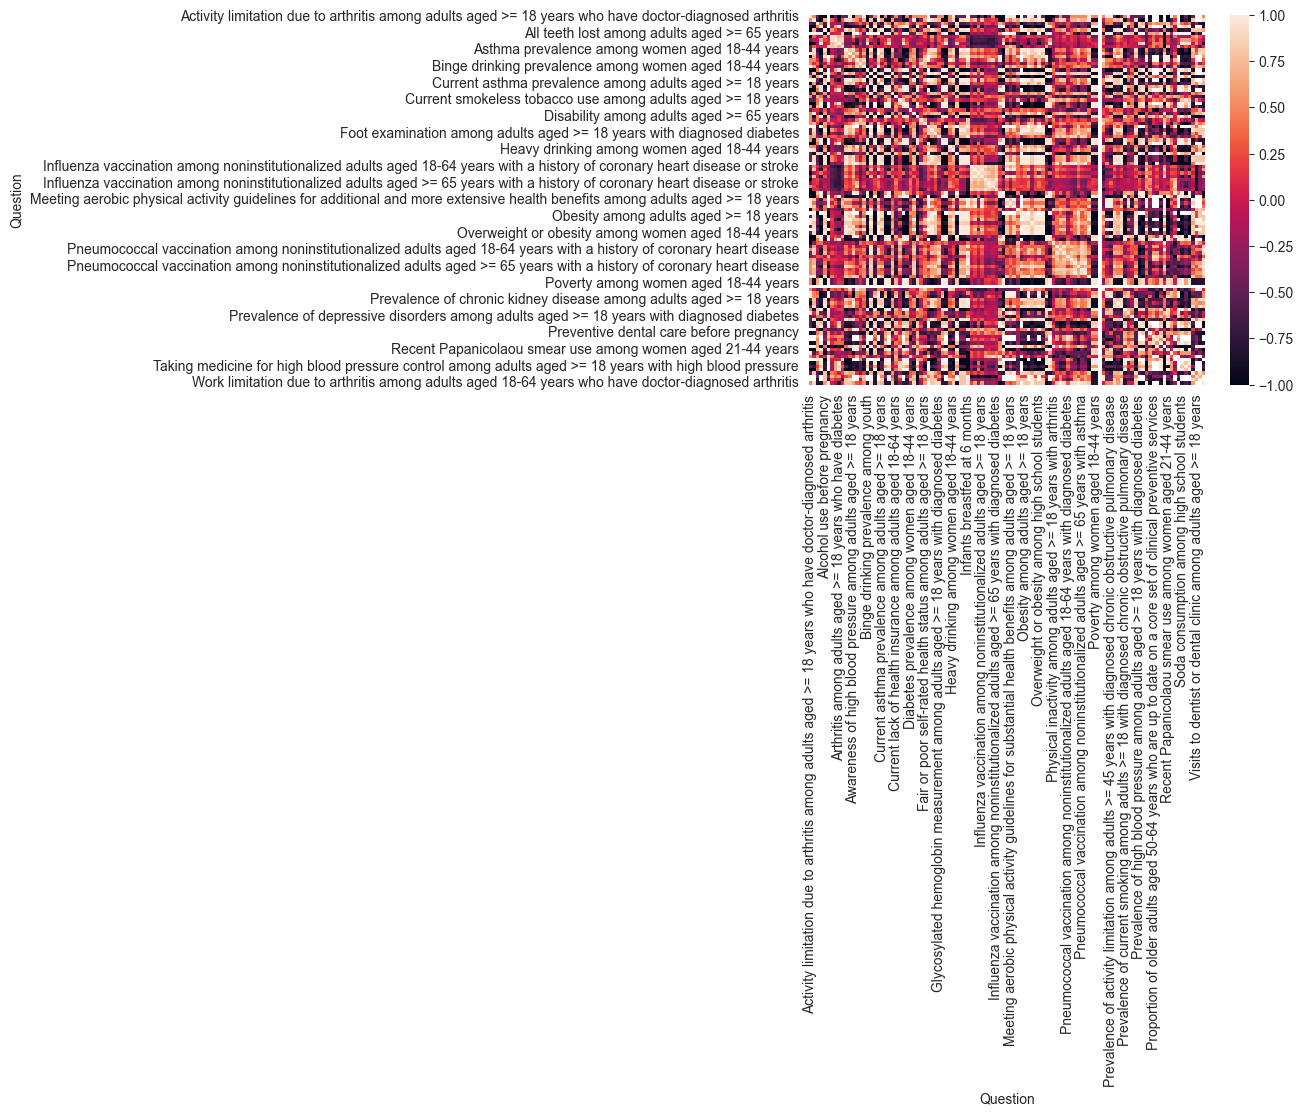

In [72]:
sns.heatmap(corr_spearman)